# Reaction Velocity of an Enzymatic Reaction

##Data Initialization


### *Installing Pydataset library and assigning the dataset 'Puromycin' to the variable df*















In [ ]:
pip install pydataset

     |████████████████████████████████| 15.9 MB 29.9 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=4f07f6ce4b3bd4d4411e9aabb2cb9355cf9cacde80e4f52184314d6ffee37306
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [ ]:
import pydataset

initiated datasets repo at: /root/.pydataset/


In [ ]:
df = pydataset.data('Puromycin')
df

,conc,rate,state
1,0.02,76,treated
2,0.02,47,treated
3,0.06,97,treated
4,0.06,107,treated
5,0.11,123,treated
6,0.11,139,treated
7,0.22,159,treated
8,0.22,152,treated
9,0.56,191,treated
10,0.56,201,treated


We can see that the Dataset "Puromycin" consists of three columns 'conc' , 'rate' and 'state' and 23 rows


conc:
   a numeric vector of substrate concentrations (ppm)

rate:
   a numeric vector of instantaneous reaction rates (counts/min/min)

state:
   a factor with levels treated untreated

## EDA on DataSet

**Carrying out the Elementary Data Analysis as specified by the project requirements**

In [ ]:
# i)Finding out the shape
df.shape

(23, 3)

In [ ]:
# ii) Finding out the dimensions
df.ndim

2

In [ ]:
# iii) Info of dataset
df.info

<bound method DataFrame.info of     conc  rate      state
1   0.02    76    treated
2   0.02    47    treated
3   0.06    97    treated
4   0.06   107    treated
5   0.11   123    treated
6   0.11   139    treated
7   0.22   159    treated
8   0.22   152    treated
9   0.56   191    treated
10  0.56   201    treated
11  1.10   207    treated
12  1.10   200    treated
13  0.02    67  untreated
14  0.02    51  untreated
15  0.06    84  untreated
16  0.06    86  untreated
17  0.11    98  untreated
18  0.11   115  untreated
19  0.22   131  untreated
20  0.22   124  untreated
21  0.56   144  untreated
22  0.56   158  untreated
23  1.10   160  untreated>

In [ ]:
# iv) Checking if data has any missing or null values
df.isnull().sum()

conc     0
rate     0
state    0
dtype: int64

In [ ]:
# v) Checking the datatype of each column
df.dtypes

conc     float64
rate       int64
state     object
dtype: object

In [ ]:
#Checking target variable rate,conc and state whether it is continuous or discrete
print(df['rate'].unique()[0:23])
print(df['state'].unique())
print(df['conc'].unique())

[ 76  47  97 107 123 139 159 152 191 201 207 200  67  51  84  86  98 115
 131 124 144 158 160]
['treated' 'untreated']
[0.02 0.06 0.11 0.22 0.56 1.1 ]


After carrying out unique commands to check out whether the variables are continuous or discrete, the observations analysed are:-



1.   `Rate variable is a integer data type which is distinct and can be considered as continuous or discrete depending on bin size`
2.   `State variable is a categorical data type which has two types 'treated' and 'untreated' and is discrete`
3.   `Conc variable is a float data type which has only 6 different values and can be considered as discrete`




In [ ]:
# Counting the categorical variable 'state'
df['state'].value_counts()

treated      12
untreated    11
Name: state, dtype: int64

In [ ]:
# vii) Statistics : Calculating the mean, median and mode
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


conc      0.312174
rate    126.826087
dtype: float64

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


conc      0.11
rate    124.00
dtype: float64

In [ ]:
from scipy import stats as s
s.mode(df['conc'])

ModeResult(mode=array([0.02]), count=array([4]))

We can observe that only conc column of 0.02 has a mode as rate column has unique values for each row

In [ ]:
#Checking if there is any null values in data set
df.isnull().values.any()

False

 **viii)  Since as we found out that there is no null values, we dont need to replace the null values with 0 or the mean in the dataset**

In [ ]:
# ix) Finding unique values of each coloumn
df['rate'].unique()

array([ 76,  47,  97, 107, 123, 139, 159, 152, 191, 201, 207, 200,  67,
        51,  84,  86,  98, 115, 131, 124, 144, 158, 160])

In [ ]:
df['conc'].unique()

array([0.02, 0.06, 0.11, 0.22, 0.56, 1.1 ])

In [ ]:
df['state'].unique()

array(['treated', 'untreated'], dtype=object)

## Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

Plotting a basic scatter plot from matploitlib to get a general idea of the split of data, with x axis being **concentration** and y axis being the **rate**

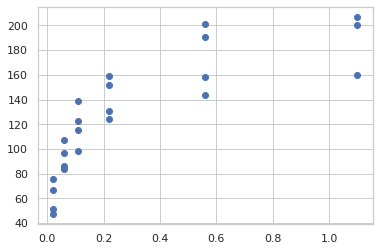

In [ ]:

plt.scatter(df.conc, df.rate)

**Plotting Boxplots and Violinplots of the conc and rate column to get an idea about their distribution (symmetric and density wise) and to check for outliers**

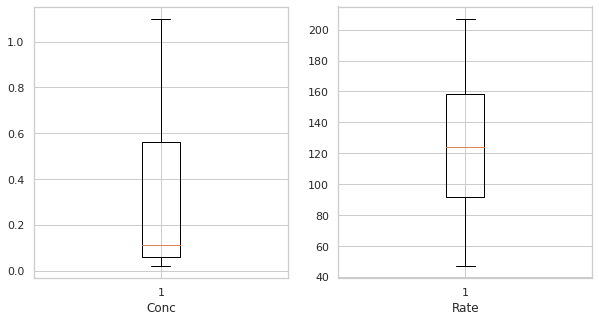

In [ ]:
#BOXPLOT of conc and rate
fig,ax=plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot(df['conc'])
ax[0].set_xlabel("Conc")
ax[1].boxplot(df['rate'])
ax[1].set_xlabel("Rate")

plt.show()

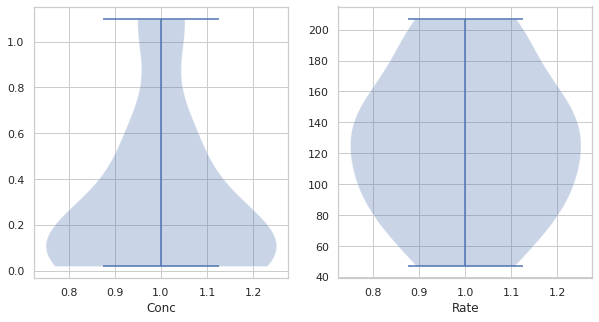

In [ ]:
#VIOLINPLOT of conc and rate
fig,ax=plt.subplots(1,2, figsize=(10,5))
ax[0].violinplot(df['conc'])
ax[0].set_xlabel("Conc")
ax[1].violinplot(df['rate'])
ax[1].set_xlabel("Rate")

plt.show()


From the Boxplot and the Violinplot of both the conc and rate columns, we can see that the -



*   Both the columns do not posses any outliers
*   Conc has a quartile range lying between approx 0.1 to 0.5 having a higher density in that space spefifically from 0.0 to 0.2 gradually decreasing as concentration value increases. The median is slightly towards the left in 1.0.
*   Rate has a uniform distribution with density lying in the middle around 120 and the quartile range being from 90 to 155








**Plotting Pairplot and Joint Plot to understand more about the data , checking whether we could get any plausible results to Analyse**

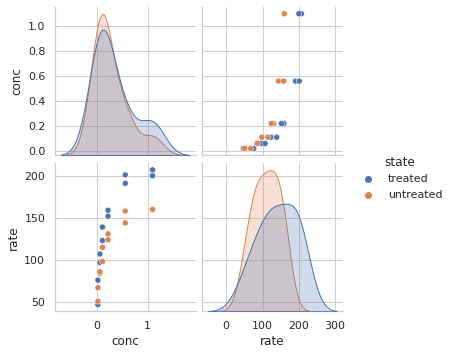

In [ ]:
sns.pairplot(data = df, hue='state')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


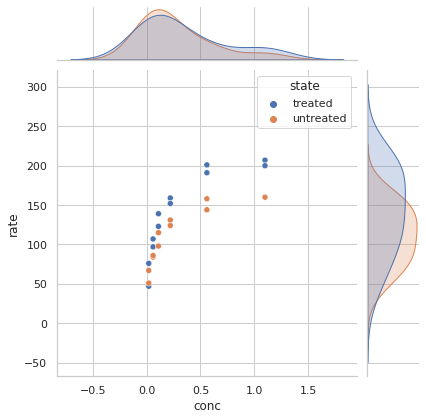

In [ ]:
sns.jointplot("conc","rate", data=df, hue='state')

From the two plots , we can observe that there is a clear increase in rate or reaction velocity as concentration increases. From using the hue parameter we can see that Enzymes treated with Puromycin have a greater increase in rate when compared to enzymes not treated with Puromycin.

** Plotting Barplot and Pointplot to get a greater understanding in change of rate vs concentration**

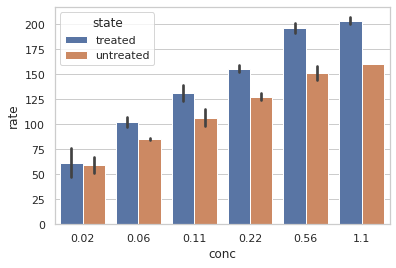

In [ ]:
#Plotting a barplot to visually view the difference in rate for concentration between treated and untreated
sns.barplot(x=df.conc, y=df.rate, data=df, hue = 'state')

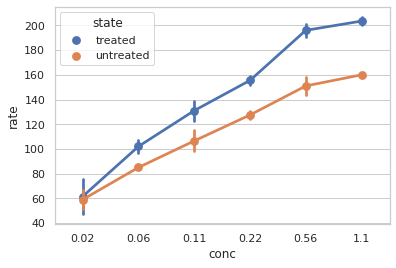

In [ ]:
sns.pointplot(x=df.conc, y=df.rate, data=df, hue='state')

We can clearly observe from the aobve two and the previous plots that --



1.   The Reaction rate (Rate coloumn) of an enzyme reaction increases as the concentration (conc column) increases
2.   The Reaction rate of an enzyme increases at a higher rate as the concentration is increased when it is treated with Puromycin as opposed to when its not.


Overall, using this data we can clearly analyse the impact of the chemical Puromycin on enzymatic reactions and reaction velocity of such reactions, Further detailed analysis could be carried out by making specific mathematical models such as

